# Taller práctico sobre Análisis EDA
Por: Sebastian Chavarry

* Gestión del proyecto: Validar objetivos y factibilidad.
* Revise con criterio los recursos disponibles y asegúrese de confirmalo luego.
* Use el análisis exploratorio y descriptivo para corroborar los criterios antes planteados
* **Introducción a la Regresión Lineal**

# **Definición del problema**

### 1. ¿Cuál es el problema?
Existe una falta de estandarización y claridad al momento de definir las propuestas económicas para nuevos ingresos. Sin una base fundamentada en datos, la organización corre el riesgo de ofrecer salarios fuera de mercado o generar inequidad interna.

---

###  2. ¿Cuáles son los objetivos?

#### **A. Objetivo Descriptivo (Pasado y Presente)**
*   **Identificación de Drivers:** Analizar y entender cuáles son los factores principales (como experiencia, educación o desempeño) que históricamente han determinado los niveles salariales en la empresa.
*   **Relación de Variables:** Mapear las correlaciones entre las variables independientes y la remuneración actual.

#### **B. Objetivo Predictivo (Futuro)**
*   **Estimación de Salarios:** Desarrollar un modelo predictivo capaz de estimar el salario óptimo para un nuevo colaborador en función de su perfil específico, asegurando competitividad y consistencia.

---

###  3. ¿Cómo resolvemos los objetivos?

1.  **Análisis Exploratorio de Datos (EDA):** Realizar un estudio profundo para entender las distribuciones y las relaciones críticas entre las variables independientes vs. la variable dependiente (`Salario_Soles`).
2.  **Modelo de Regresión:** Desarrollar y validar un modelo de regresión (lineal o avanzada) que permita cuantificar el impacto de cada variable y realizar predicciones precisas.



# Importación de librerías

In [ ]:
import pandas as pd # pandas es una libreria para analisis de datos
import seaborn as sns # seaborn es una librería para hacer graficos estadisticos
import numpy as np # numpy es una libreria para analisis estadisticos y matematicos
import matplotlib.pyplot as plt # es una libreria de visualizacion
import io # io es una libreria complementaria de python para poder ayudar a la carga de archivos locales

# Lectura de Datos

In [7]:
# Importamos el dataset y el diccionario como df y dic respectivamente
df = pd.read_csv('data.csv')
dic = pd.read_excel('dic.xlsx', sheet_name='Diccionario')
data = df # Mantenemos compatibility con el resto del notebook

In [5]:
df.head()

,Experiencia,Nivel_Educativo,Evaluacion_Desempeno,Horas_Semanales,Edad,Genero,Departamento,Anos_en_la_Empresa,Titulo_Universitario,Nivel_Competencias,Salario_Soles
0,7,Maestria,3.765610,54,59,Hombre,TI,4,1,4.018661,5100
1,15,Doctorado,8.227233,59,43,Mujer,Finanzas,1,0,9.570376,5300
2,11,Maestria,5.852451,44,47,Mujer,Recursos Humanos,6,0,5.797498,6000
3,8,Maestria,3.801769,32,64,Mujer,TI,5,0,6.683899,5100
4,7,Grado,6.493004,48,60,Mujer,Ventas,10,0,5.886464,6400


In [8]:
display(dic)

,Variable,Descripción,Año de Actualización,Fuente,Nivel de seguridad
0,ID,Código de identificación,2025.0,Propia,1.0
1,Experiencia,Años de experiencia laboral,2024.0,Propia,1.0
2,Nivel_Educativo,Nivel educativo alcanzado,2020.0,Propia,1.0
3,Evaluacion_Desempeno,Calificación en la evaluación anual de desempeño,2024.0,Hermes Control,2.0
4,Horas_Semanales,Cantidad de horas laborales registradas,2025.0,Propia,1.0
5,Edad,Edad en años,2024.0,Propia,1.0
6,Genero,Sexo declarado,2024.0,Propia,1.0
7,Departamento,Área a la que pertenece,2022.0,Propia,1.0
8,Anos_en_la_Empresa,Cantidad de años laborados en la empresa (desd...,2024.0,Propia,1.0
9,Titulo_Universitario,Cuenta con título universitario,2019.0,Propia,1.0


In [9]:
data.info() # info es una función para conocer las principales caracteristicas de mi base de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Experiencia           1000 non-null   int64  
 1   Nivel_Educativo       1000 non-null   object 
 2   Evaluacion_Desempeno  1000 non-null   float64
 3   Horas_Semanales       1000 non-null   int64  
 4   Edad                  1000 non-null   int64  
 5   Genero                1000 non-null   object 
 6   Departamento          1000 non-null   object 
 7   Anos_en_la_Empresa    1000 non-null   int64  
 8   Titulo_Universitario  1000 non-null   int64  
 9   Nivel_Competencias    1000 non-null   float64
 10  Salario_Soles         1000 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 86.1+ KB


### Diccionario de Datos y Clasificación de Variables

| Variable | Tipo de Dato | Clasificación Estadística | Subtipo |
| :--- | :--- | :--- | :--- |
| **Genero** | `object` | Cualitativa | Nominal |
| **Departamento** | `object` | Cualitativa | Nominal |
| **Titulo_Universitario**| `int64` | Cualitativa | Nominal (Binaria) |
| **Nivel_Educativo** | `object` | Cualitativa | Ordinal |
| **Experiencia** | `int64` | Cuantitativa | Discreta |
| **Horas_Semanales** | `int64` | Cuantitativa | Discreta |
| **Edad** | `int64` | Cuantitativa | Discreta |
| **Anos_en_la_Empresa** | `int64` | Cuantitativa | Discreta |
| **Evaluacion_Desempeno**| `float64`| Cuantitativa | Continua |
| **Nivel_Competencias** | `float64`| Cuantitativa | Continua |
| **Salario_Soles** | `int64` | Cuantitativa | Continua |

---
**Notas de clasificación:**
* **Cualitativas:** Representan categorías o atributos.
* **Cuantitativas:** Representan cantidades numéricas.

### Definición del Modelo de Análisis

Para el desarrollo del estudio (o modelo predictivo), los datos se han estructurado en función de su rol en el análisis:

#### Variable Objetivo (Target)
*   **Salario_Soles:** Es la variable dependiente que deseamos explicar o predecir en función de las demás características del colaborador.

#### Variables Independientes (Features/Predictoras)
Son los factores que influyen en la determinación del salario:

| Categoría | Variables |
| :--- | :--- |
| **Profesional** | Experiencia, Nivel_Educativo, Titulo_Universitario, Anos_en_la_Empresa |
| **Desempeño** | Evaluacion_Desempeno, Nivel_Competencias |
| **Demográfico** | Edad, Genero, Departamento |
| **Laboral** | Horas_Semanales |


# **Análisis Descriptivo**

- Objetivo del análisis descriptivo, entender como se estan comportando todas las variables de mi base de datos (Univariado)
- Objetivo entender si hay relaciones de las variables independientes vs la dependiente desde su comportamiento historico (Multivariado)

**Análisis Univariado**

    Variables Cuantitativas

#### **2.1.1 Análisis de Experiencia**


In [56]:
# Estadísticas descriptivas de Experiencia
stats = data['Experiencia'].describe()
print(stats)
print(f'Asimetría: {data["Experiencia"].skew()}')


count    1000.000000
mean        9.746000
std         5.651497
min         1.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        19.000000
Name: Experiencia, dtype: float64
Asimetría: 0.06016683860972402


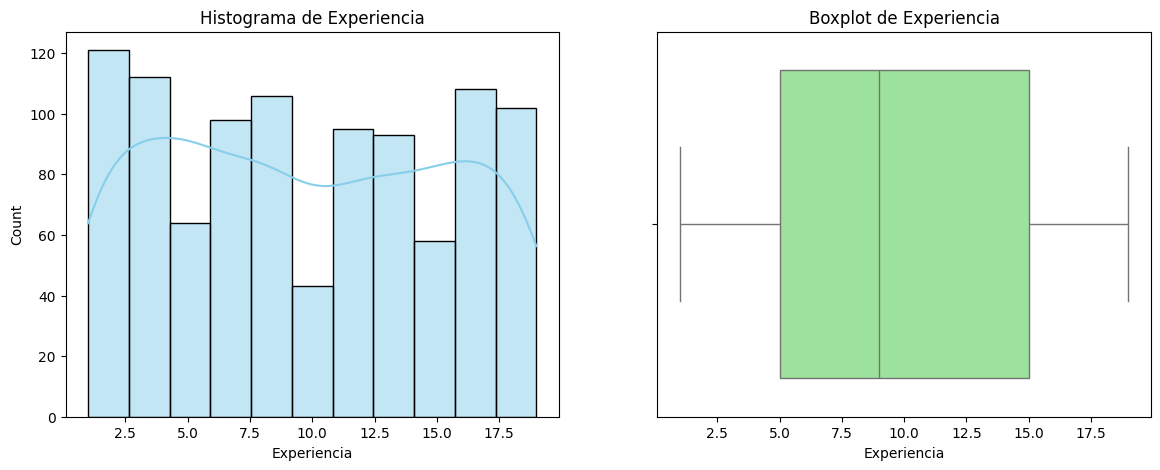

In [57]:
# Visualización de Experiencia
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data['Experiencia'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Histograma de Experiencia')
sns.boxplot(x=data['Experiencia'], ax=ax[1], color='lightgreen')
ax[1].set_title('Boxplot de Experiencia')
plt.show()


---


#### **2.1.2 Análisis de Evaluacion_Desempeno**


In [54]:
# Estadísticas descriptivas de Evaluacion_Desempeno
stats = data['Evaluacion_Desempeno'].describe()
print(stats)
print(f'Asimetría: {data["Evaluacion_Desempeno"].skew()}')


count    1000.000000
mean        5.502136
std         2.575975
min         1.014086
25%         3.325307
50%         5.561551
75%         7.697160
max         9.985128
Name: Evaluacion_Desempeno, dtype: float64
Asimetría: -0.01879142180005199


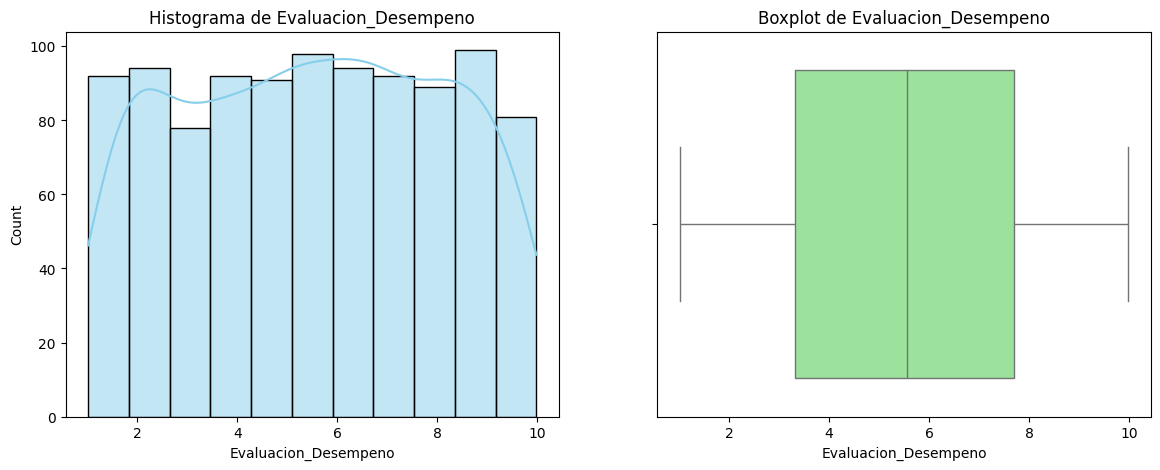

In [55]:
# Visualización de Evaluacion_Desempeno
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data['Evaluacion_Desempeno'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Histograma de Evaluacion_Desempeno')
sns.boxplot(x=data['Evaluacion_Desempeno'], ax=ax[1], color='lightgreen')
ax[1].set_title('Boxplot de Evaluacion_Desempeno')
plt.show()


---


#### **2.1.3 Análisis de Horas_Semanales**


In [52]:
# Estadísticas descriptivas de Horas_Semanales
stats = data['Horas_Semanales'].describe()
print(stats)
print(f'Asimetría: {data["Horas_Semanales"].skew()}')


count    1000.000000
mean       44.573000
std         8.665204
min        30.000000
25%        37.000000
50%        45.000000
75%        52.000000
max        59.000000
Name: Horas_Semanales, dtype: float64
Asimetría: -0.03173889678122882


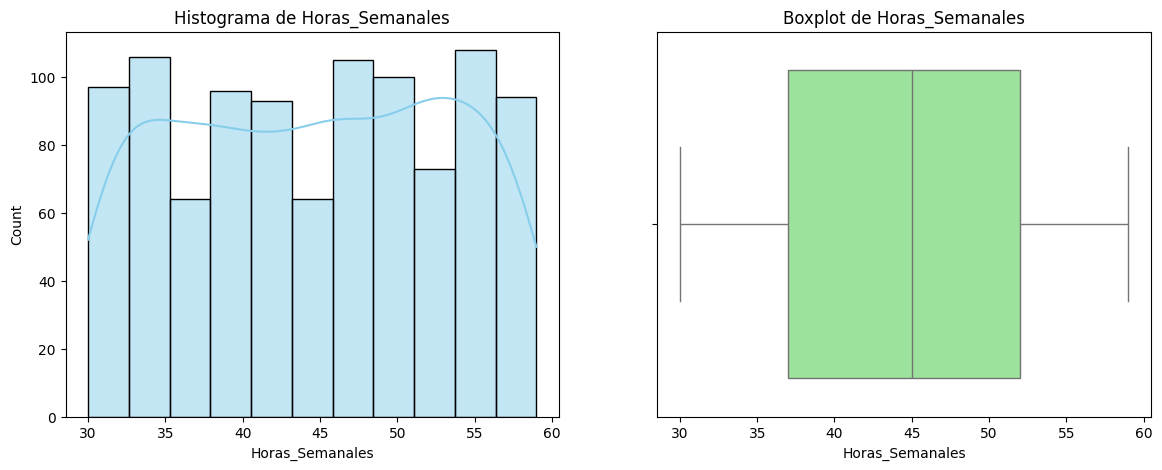

In [53]:
# Visualización de Horas_Semanales
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data['Horas_Semanales'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Histograma de Horas_Semanales')
sns.boxplot(x=data['Horas_Semanales'], ax=ax[1], color='lightgreen')
ax[1].set_title('Boxplot de Horas_Semanales')
plt.show()


---


#### **2.1.4 Análisis de Edad**


In [50]:
# Estadísticas descriptivas de Edad
stats = data['Edad'].describe()
print(stats)
print(f'Asimetría: {data["Edad"].skew()}')


count    1000.000000
mean       43.308000
std        12.255584
min        22.000000
25%        33.000000
50%        43.000000
75%        53.000000
max        64.000000
Name: Edad, dtype: float64
Asimetría: -0.0182560429156514


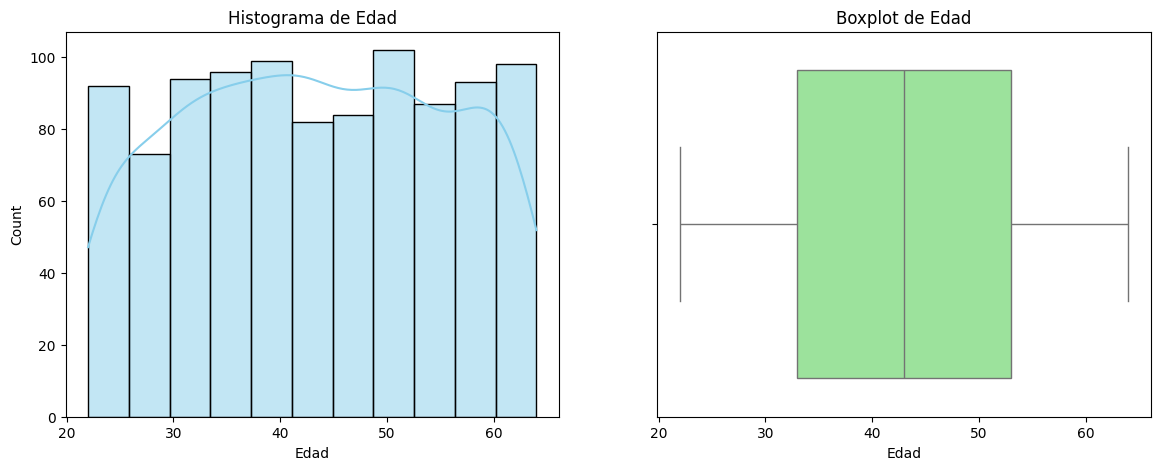

In [51]:
# Visualización de Edad
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data['Edad'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Histograma de Edad')
sns.boxplot(x=data['Edad'], ax=ax[1], color='lightgreen')
ax[1].set_title('Boxplot de Edad')
plt.show()


---


#### **2.1.5 Análisis de Anos_en_la_Empresa**


In [48]:
# Estadísticas descriptivas de Anos_en_la_Empresa
stats = data['Anos_en_la_Empresa'].describe()
print(stats)
print(f'Asimetría: {data["Anos_en_la_Empresa"].skew()}')


count    1000.000000
mean        7.469000
std         4.035012
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        14.000000
Name: Anos_en_la_Empresa, dtype: float64
Asimetría: -0.010184553150659411


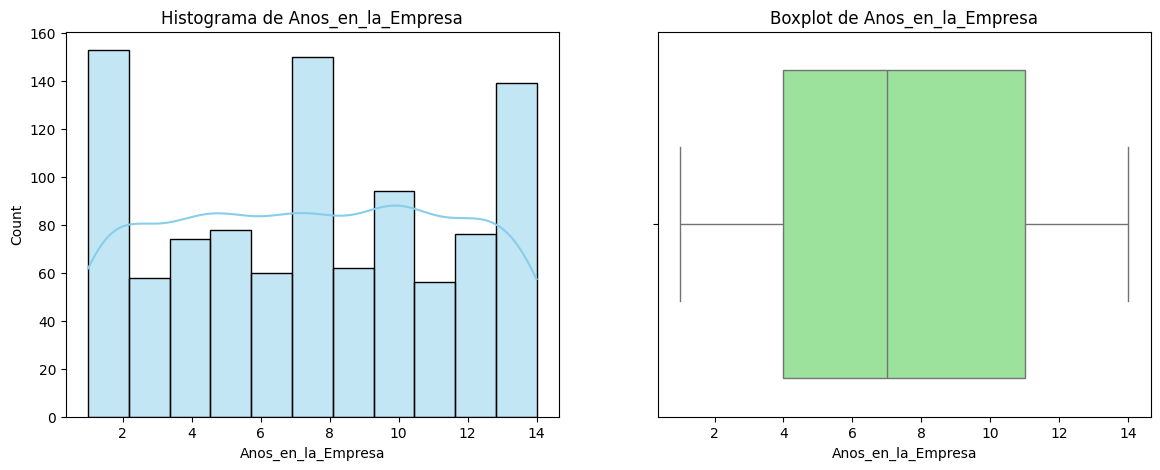

In [49]:
# Visualización de Anos_en_la_Empresa
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data['Anos_en_la_Empresa'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Histograma de Anos_en_la_Empresa')
sns.boxplot(x=data['Anos_en_la_Empresa'], ax=ax[1], color='lightgreen')
ax[1].set_title('Boxplot de Anos_en_la_Empresa')
plt.show()


---


#### **2.1.6 Análisis de Nivel_Competencias**


In [46]:
# Estadísticas descriptivas de Nivel_Competencias
stats = data['Nivel_Competencias'].describe()
print(stats)
print(f'Asimetría: {data["Nivel_Competencias"].skew()}')


count    1000.000000
mean        5.461683
std         2.619626
min         1.012855
25%         3.181642
50%         5.423808
75%         7.851143
max         9.995146
Name: Nivel_Competencias, dtype: float64
Asimetría: 0.047266914336225034


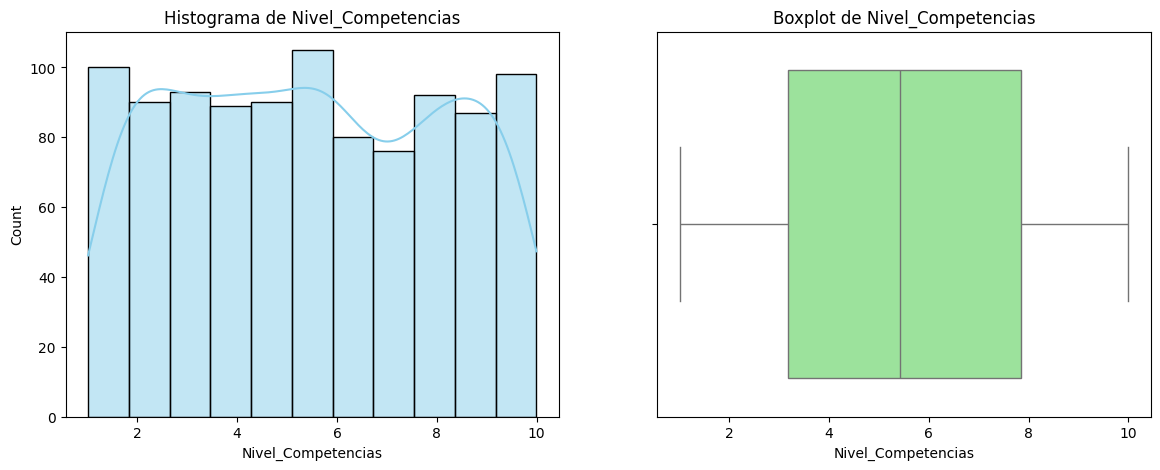

In [47]:
# Visualización de Nivel_Competencias
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data['Nivel_Competencias'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Histograma de Nivel_Competencias')
sns.boxplot(x=data['Nivel_Competencias'], ax=ax[1], color='lightgreen')
ax[1].set_title('Boxplot de Nivel_Competencias')
plt.show()


---


#### **2.1.7 Análisis de Salario_Soles**


In [44]:
# Estadísticas descriptivas de Salario_Soles
stats = data['Salario_Soles'].describe()
print(stats)
print(f'Asimetría: {data["Salario_Soles"].skew()}')


count     1000.000000
mean      6442.400000
std       1648.447639
min       2500.000000
25%       5300.000000
50%       6500.000000
75%       7600.000000
max      10500.000000
Name: Salario_Soles, dtype: float64
Asimetría: -0.016302909902312715


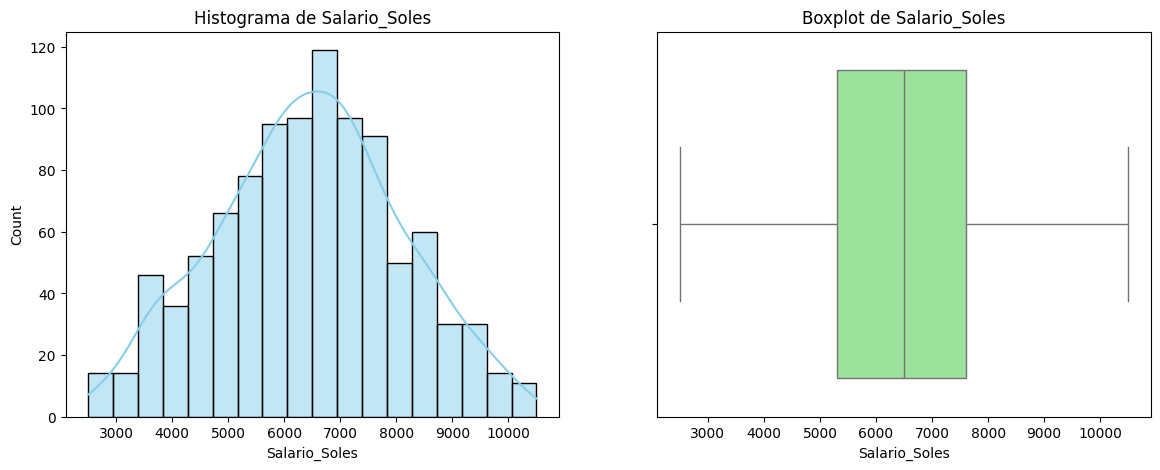

In [45]:
# Visualización de Salario_Soles
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data['Salario_Soles'], kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Histograma de Salario_Soles')
sns.boxplot(x=data['Salario_Soles'], ax=ax[1], color='lightgreen')
ax[1].set_title('Boxplot de Salario_Soles')
plt.show()


## Interpretación
La distribución sugiere una política salarial bien estructurada con bandas definidas. No hay evidencia de inequidades extremas, aunque se recomienda analizar esta variable segmentada por departamento, género y nivel educativo para detectar posibles brechas.

---


### **Variables Cualitativas**
Análisis de frecuencia y distribución de categorías.


#### **2.2.1 Análisis de Nivel_Educativo**


In [30]:
# Conteo de valores para Nivel_Educativo
conteo = data['Nivel_Educativo'].value_counts()
porcentaje = data['Nivel_Educativo'].value_counts(normalize=True) * 100
summary = pd.DataFrame({'Frecuencia': conteo, 'Porcentaje (%)': porcentaje})
print(summary)


                 Frecuencia  Porcentaje (%)
Nivel_Educativo                            
Grado                   343            34.3
Maestria                336            33.6
Doctorado               321            32.1


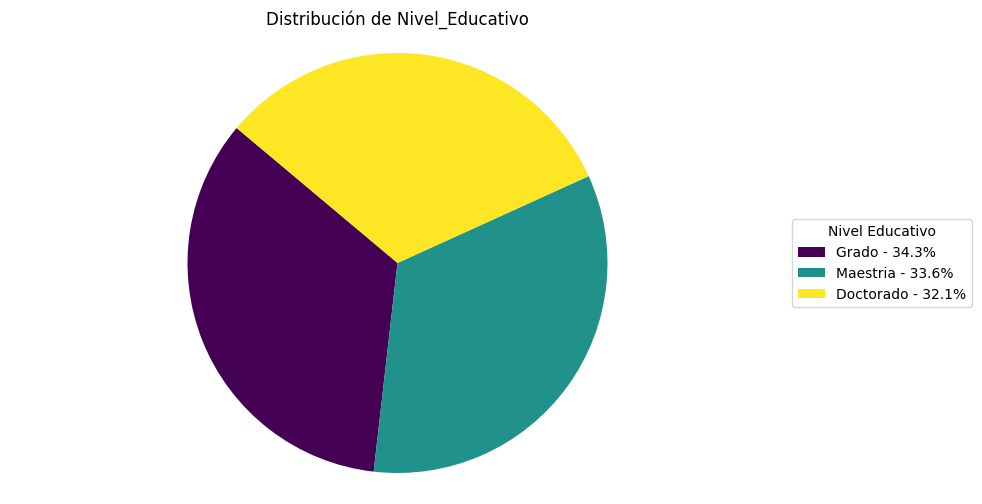

In [32]:
# Obtener conteos y etiquetas
counts = data['Nivel_Educativo'].value_counts()
labels = counts.index
values = counts.values
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Gráfico circular para Nivel_Educativo
plt.figure(figsize=(10, 6))
patches, texts = plt.pie(values, colors=colors, startangle=140)

# Crear leyenda con porcentajes
porcentajes = 100. * values / values.sum()
labels_leyenda = [f'{l} - {p:1.1f}%' for l, p in zip(labels, porcentajes)]

plt.legend(patches, labels_leyenda, title="Nivel Educativo", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribución de Nivel_Educativo')
plt.axis('equal') 
plt.show()

## Interpretacion

La distribución casi perfecta de tercios entre Grado, Maestría y Doctorado es altamente atípica para cualquier empresa real. Normalmente veríamos una pirámide con mayoría de grados y pocos doctorados. Esto sugiere que el dataset es sintético, o que la empresa tiene una política muy agresiva de contratación de talento altamente calificado, lo cual implicaría costos laborales elevados que deberían reflejarse en los salarios (algo a validar cruzando ambas variables).

---


#### **2.2.2 Análisis de Genero**


In [33]:
# Conteo de valores para Genero
conteo = data['Genero'].value_counts()
porcentaje = data['Genero'].value_counts(normalize=True) * 100
summary = pd.DataFrame({'Frecuencia': conteo, 'Porcentaje (%)': porcentaje})
print(summary)


        Frecuencia  Porcentaje (%)
Genero                            
Hombre         515            51.5
Mujer          485            48.5


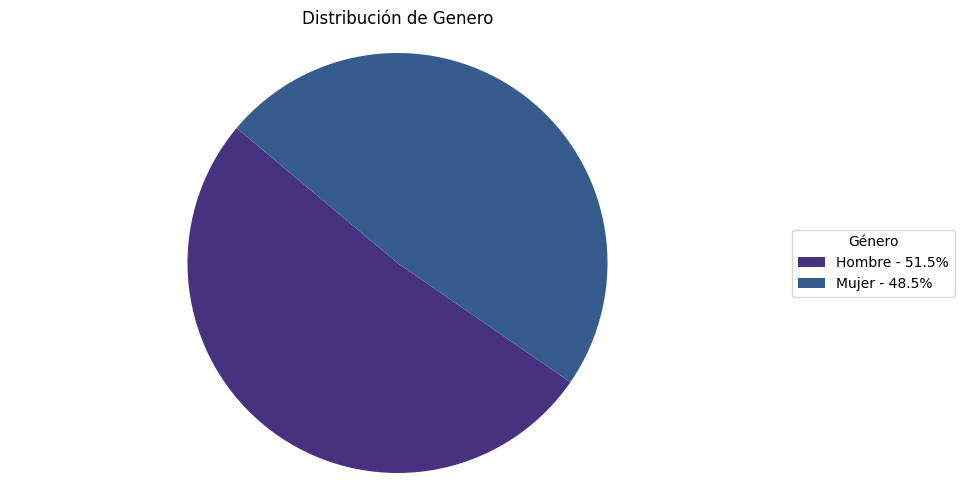

In [35]:
# Gráfico circular para Genero con leyenda
counts = data['Genero'].value_counts()
labels = counts.index
values = counts.values

plt.figure(figsize=(10, 6))
patches, texts = plt.pie(values, startangle=140, colors=sns.color_palette('viridis'))

# Generar etiquetas para la leyenda con porcentajes
porcentajes = 100. * values / values.sum()
labels_leyenda = [f'{l} - {p:1.1f}%' for l, p in zip(labels, porcentajes)]

plt.legend(patches, labels_leyenda, title="Género", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribución de Genero')
plt.axis('equal')
plt.show()

La paridad casi perfecta (51.5% hombres, 48.5% mujeres) indica un excelente balance de género en la fuerza laboral, aunque lo relevante sería verificar si esta equidad se mantiene al segmentar por departamento, nivel jerárquico y especialmente por salario, una distribución pareja en headcount no garantiza equidad en compensación o representación en posiciones de liderazgo.

---


#### **2.2.3 Análisis de Departamento**


In [36]:
# Conteo de valores para Departamento
conteo = data['Departamento'].value_counts()
porcentaje = data['Departamento'].value_counts(normalize=True) * 100
summary = pd.DataFrame({'Frecuencia': conteo, 'Porcentaje (%)': porcentaje})
print(summary)


                  Frecuencia  Porcentaje (%)
Departamento                                
TI                       268            26.8
Finanzas                 251            25.1
Ventas                   250            25.0
Recursos Humanos         231            23.1


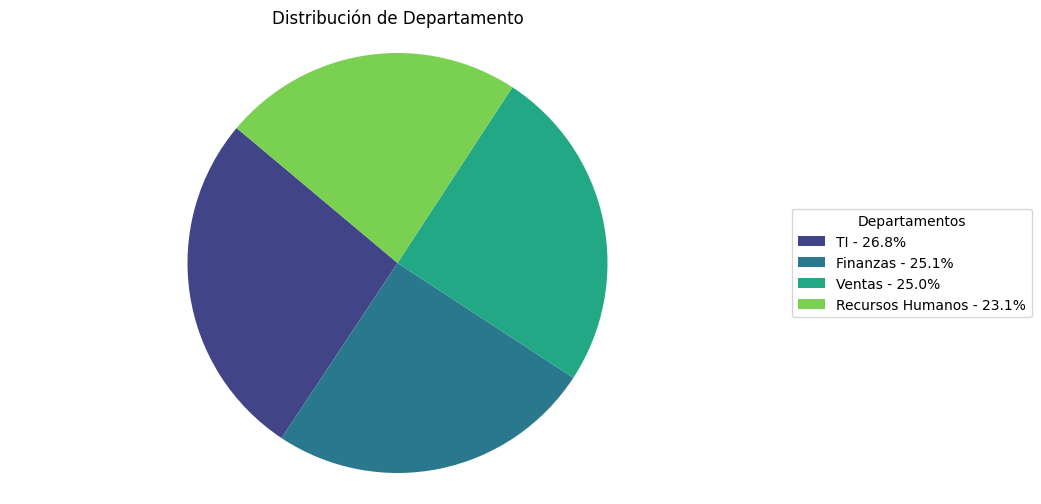

In [38]:
# Gráfico circular para Departamento
counts = data['Departamento'].value_counts()
labels = counts.index
values = counts.values

plt.figure(figsize=(10, 6))
# Dibujar el gráfico usando la paleta viridis a través de seaborn
patches, texts = plt.pie(values, startangle=140, colors=sns.color_palette('viridis', len(labels)))

# Generar etiquetas con porcentajes para la leyenda
porcentajes = 100. * values / values.sum()
labels_leyenda = [f'{l} - {p:1.1f}%' for l, p in zip(labels, porcentajes)]

# Configurar leyenda y título
plt.legend(patches, labels_leyenda, title="Departamentos", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribución de Departamento')
plt.axis('equal')
plt.show()

La distribución equilibrada entre los cuatro departamentos (~25% cada uno) es inusual para una empresa real, típicamente Ventas o áreas operativas tendrían mayor headcount que áreas de soporte como RRHH. El hecho de que TI sea el más grande (26.8%) podría indicar una empresa con fuerte componente tecnológico, aunque la uniformidad general refuerza la hipótesis de datos sintéticos o un diseño organizacional muy plano y balanceado.

---


#### **2.2.4 Análisis de Titulo_Universitario**


In [39]:
# Conteo de valores para Titulo_Universitario
conteo = data['Titulo_Universitario'].value_counts()
porcentaje = data['Titulo_Universitario'].value_counts(normalize=True) * 100
summary = pd.DataFrame({'Frecuencia': conteo, 'Porcentaje (%)': porcentaje})
print(summary)


                      Frecuencia  Porcentaje (%)
Titulo_Universitario                            
1                            505            50.5
0                            495            49.5


/var/folders/ry/zb_bj0bx0d39hp_mkrvscf7m0000gn/T/ipykernel_11353/2292871811.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=data_plot, order=['Con título', 'Sin título'], palette='viridis')


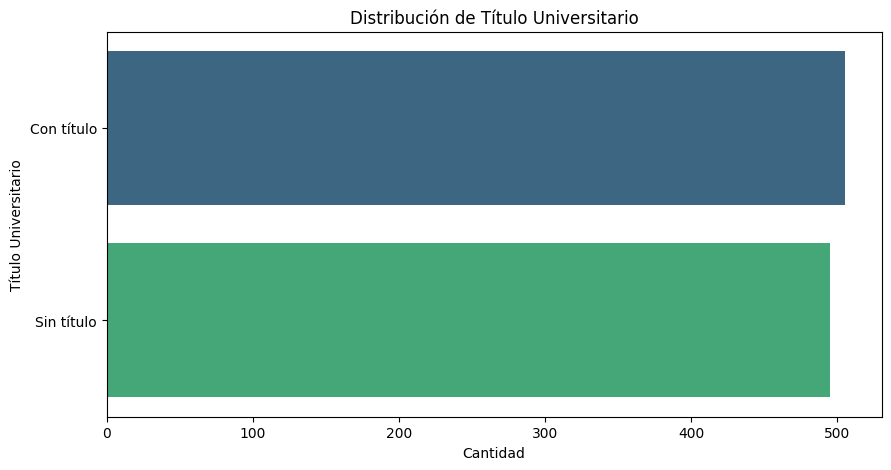

In [43]:
# Gráfico de barras para Titulo_Universitario
plt.figure(figsize=(10, 5))

# Mapear valores para mejor legibilidad
labels = {0: 'Sin título', 1: 'Con título'}
data_plot = data['Titulo_Universitario'].map(labels)

ax = sns.countplot(y=data_plot, order=['Con título', 'Sin título'], palette='viridis')
plt.title('Distribución de Título Universitario')
plt.xlabel('Cantidad')
plt.ylabel('Título Universitario')
plt.show()


Esta proporción tan cercana al 50/50 sigue siendo atípica para datos orgánicos, y el siguiente paso lógico sería verificar si esos 10 empleados adicionales con título se traducen en diferencias salariales estadísticamente significativas o si el título no aporta prima salarial en esta organización.

## Conclusiones Generales del Análisis Exploratorio

### Sobre la Naturaleza del Dataset

El dataset presenta características que sugieren fuertemente que es **sintético o generado artificialmente**: distribuciones uniformes en variables que típicamente mostrarían patrones orgánicos (experiencia, edad, años en empresa), proporciones casi exactas de 50/50 en género y título universitario, y tercios perfectos en nivel educativo. Esto no invalida el análisis, pero limita la extrapolación a escenarios reales de negocio.

### Hallazgos Clave

**Salario** es la única variable con comportamiento estadístico natural. distribución normal con media de S/ 6,442, asimetría prácticamente cero (-0.016) y sin outliers. Esto sugiere una política salarial estructurada con bandas definidas entre S/ 2,500 y S/ 10,500.

**Composición organizacional** muestra balance inusual: paridad de género (51.5%/48.5%), departamentos equidistribuidos (~25% cada uno), y un porcentaje atípicamente alto de doctorados (32%) para cualquier industria convencional.

**Variables de desempeño** (Evaluación_Desempeño y Nivel_Competencias) presentan distribuciones uniformes, lo que indica un sistema de evaluación poco discriminante o falta de diferenciación real entre colaboradores.

### Recomendaciones para Profundizar

El valor analítico real vendrá del **análisis y multivariado**: correlacionar salario con nivel educativo, género y departamento para detectar brechas; evaluar si experiencia y competencias impactan la compensación; y segmentar desempeño por área para identificar patrones ocultos que las distribuciones univariadas no revelan.

# Analisis Multivariado

---


<Axes: xlabel='Experiencia', ylabel='Salario_Soles'>

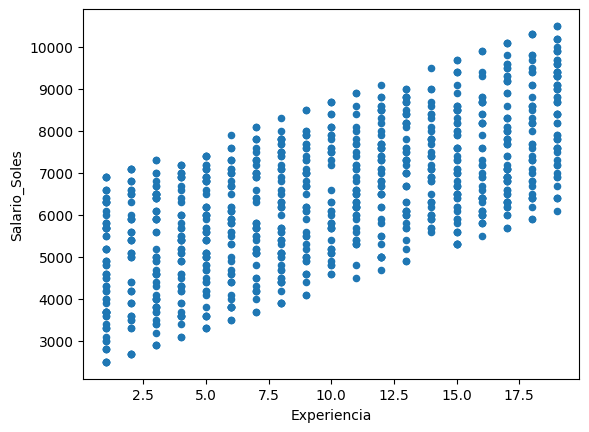

In [58]:
# ¿Hay relación entre los años de experiencia y el salario en soles?
data.plot.scatter(x="Experiencia", y="Salario_Soles")

Se observa una clara correlación positiva entre experiencia y salario, a mayor experiencia, mayor compensación. El patrón escalonado (columnas verticales) se debe a que experiencia es discreta (años enteros), y el rango salarial se va desplazando hacia arriba conforme aumentan los años, lo cual confirma que la empresa tiene una política donde la antigüedad/experiencia sí impacta directamente en el sueldo.

<Axes: xlabel='Evaluacion_Desempeno', ylabel='Salario_Soles'>

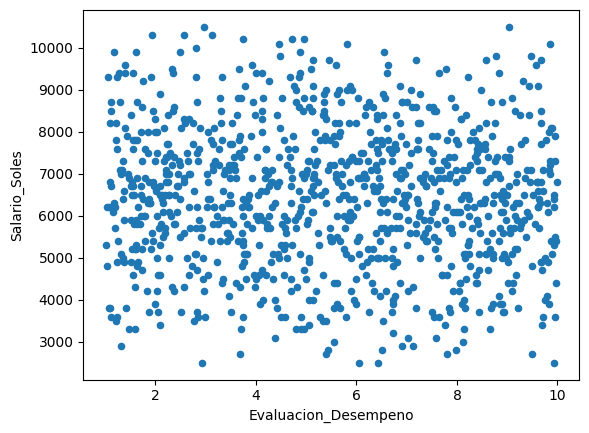

In [59]:
# ¿Hay relación entre la evaluación de desempeño y el salario en soles?
data.plot.scatter(x="Evaluacion_Desempeno", y="Salario_Soles")

No existe correlación entre evaluación de desempeño y salario, los puntos forman una nube dispersa sin patrón definido. Esto indica que la empresa no vincula la compensación al rendimiento individual, lo cual podría ser un problema de incentivos: un empleado con calificación 2 gana lo mismo que uno con calificación 10, sugiriendo que los aumentos dependen más de antigüedad que de mérito.

<Axes: xlabel='Horas_Semanales', ylabel='Salario_Soles'>

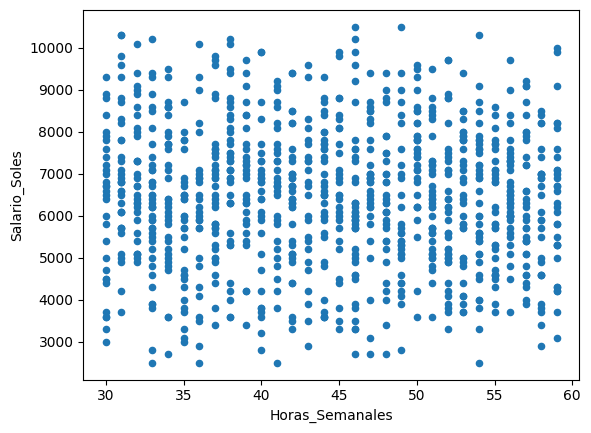

In [60]:
# ¿Hay relación entre las horas semanales y el salario en soles?
data.plot.scatter(x="Horas_Semanales", y="Salario_Soles")

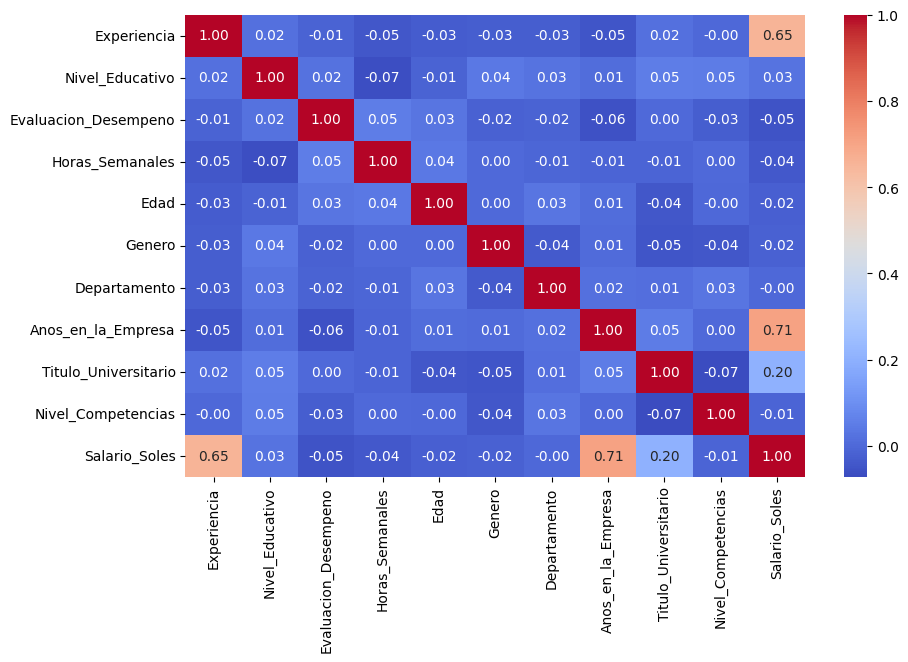

In [62]:
data_encoded = data.copy()

# Codificación ordinal manual para Nivel_Educativo
orden_educativo = {'Grado': 1, 'Maestria': 2, 'Doctorado': 3}
# Se realiza esto porque orden_eductivo es categoria ordinal
data_encoded['Nivel_Educativo'] = data['Nivel_Educativo'].map(orden_educativo)

# Para nominales (Genero, Departamento) factorize está ok o mejor excluirlas
# ya que la correlación de Pearson no tiene sentido interpretativo para nominales
data_encoded['Genero'] = pd.factorize(data['Genero'])[0]
data_encoded['Departamento'] = pd.factorize(data['Departamento'])[0]

corr_matrix = data_encoded.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

### Predictores fuertes del salario:

- Años_en_la_Empresa (0.71) y Experiencia (0.65) son los principales drivers del salario la antigüedad domina la compensación
- Título_Universitario tiene impacto moderado (0.20), tener título sí aporta prima salarial

### Variables sin impacto en salario:

- Evaluación_Desempeño (-0.05) y Nivel_Competencias (-0.01) no influyen confirma que el mérito no se recompensa
- Nivel_Educativo (0.03) es irrelevante, sorprendente dado el 32% de doctorados
- Edad (-0.02), Género (-0.02) y Horas_Semanales (-0.04) tampoco afectan

### Relación clave entre variables:

- Experiencia y Años_en_la_Empresa están correlacionados (0.71 con salario ambos), lo cual es lógico pero indica posible multicolinealidad si se usan en un modelo predictivo

### Hallazgo crítico de negocio:

- La empresa paga por permanencia, no por desempeño ni educación avanzada, un doctorado con alto rendimiento gana igual que alguien sin título con bajo desempeño si tienen la misma antigüedad

# Conclusion general

El análisis exploratorio reveló que este dataset es muy probablemente sintético, las distribuciones perfectamente uniformes en experiencia, edad y años en empresa, junto con proporciones exactas de 50/50 en género y tercios perfectos en nivel educativo, no ocurren en datos reales. Más preocupante aún, las variables que deberían predecir el salario en cualquier organización sana (desempeño, competencias, educación) no muestran correlación alguna, mientras que solo la antigüedad tiene impacto. Esto no permite construir un modelo predictivo útil para negocio: no puedes estimar el salario de un candidato nuevo basándote en "años en la empresa" que aún no tiene. El verdadero hallazgo aquí no es estadístico sino organizacional, si estos datos reflejaran una empresa real, el problema a resolver no sería predecir salarios, sino cuestionar por qué el mérito y la preparación no se recompensan.